In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [45]:
rawData = pd.read_csv("filesizes.csv", names=["peerId", "method", "from", "url", "timing"])
def serverResponses(dataset):
    return dataset.loc[dataset['method'] == 'serverResponse']

def peerResponses(dataset):
    return dataset.loc[dataset['method'] == 'peerResponse']

serverData = serverResponses(rawData)
peerData = peerResponses(rawData)
urls = ["http://localhost:8080/testfiles/1mb",
       "http://localhost:8080/testfiles/5mb",
       "http://localhost:8080/testfiles/10mb",
       "http://localhost:8080/testfiles/20mb",
       "http://localhost:8080/testfiles/30mb",
       "http://localhost:8080/testfiles/40mb",
       "http://localhost:8080/testfiles/50mb",
       "http://localhost:8080/testfiles/60mb",
       "http://localhost:8080/testfiles/70mb",
       "http://localhost:8080/testfiles/80mb",
       "http://localhost:8080/testfiles/90mb",
       "http://localhost:8080/testfiles/100mb",
       "http://localhost:8080/testfiles/120mb",
       "http://localhost:8080/testfiles/140mb",
       "http://localhost:8080/testfiles/160mb",
       "http://localhost:8080/testfiles/180mb"]

index = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 120, 140, 160, 180]


[Text(0, 0.5, 'Zeit in Sekunden'), Text(0.5, 0, 'Dateigrößen in MB')]

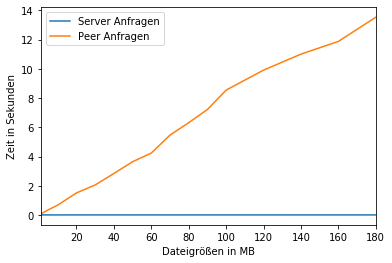

In [46]:
timings = []
for url in urls:
    peerTiming = peerData.loc[peerData["url"] == url]['timing'].mean()
    serverTiming = serverData.loc[serverData["url"] == url]['timing'].mean()
    timings.append([serverTiming/1000, peerTiming/1000])

test = pd.DataFrame(timings, index=index, columns=['Server Anfragen', 'Peer Anfragen']) 
plot = test.plot()
plot.set(xlabel="Dateigrößen in MB", ylabel="Zeit in Sekunden")

           MB/s
1     98.032708
5    110.353960
10   117.087021
20   105.602092
30   116.492018
40   112.471370
50   109.599566
60   113.189221
70   102.376927
80   101.304605
90    99.742491
100   93.601172
120   96.843356
140  101.752122
160  107.767067
180  106.426834


[Text(0, 0.5, 'MBits/s'), Text(0.5, 0, 'Dateigrößen in MB')]

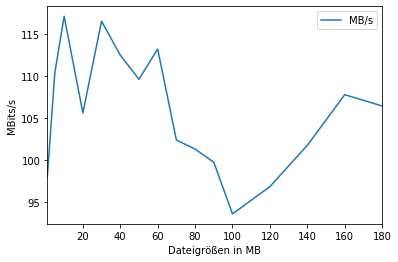

In [47]:
result = []

for i, timing in enumerate(timings):
    result.append([index[i]/timing[1]*8])
    
test = pd.DataFrame(result, index=index, columns=['MB/s']) 
print(test)
plot = test.plot()
plot.set(xlabel="Dateigrößen in MB", ylabel="MBits/s")